In [10]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [3]:
trainDF = pd.read_csv('sentenceTrainDF.csv')
testDF = pd.read_csv('sentenceTestDF.csv')

In [4]:
df = trainDF.copy()

In [5]:
df.head()

,Unnamed: 0,rid,sid,text,category_polarity_list,categorys,category_num
0,0,79,79:0,Being a PC user my whole life....,[],[],0
1,1,79,79:1,This computer is absolutely AMAZING!!!,"[('LAPTOP#GENERAL', 'positive')]",['LAPTOP#GENERAL'],1
2,2,79,79:2,10 plus hours of battery...,"[('BATTERY#OPERATION_PERFORMANCE', 'positive')]",['BATTERY#OPERATION_PERFORMANCE'],1
3,3,79,79:3,super fast processor and really nice graphics ...,"[('CPU#OPERATION_PERFORMANCE', 'positive'), ('...","['CPU#OPERATION_PERFORMANCE', 'GRAPHICS#GENERAL']",2
4,4,79,79:4,and plenty of storage with 250 gb(though I wil...,"[('HARD_DISC#DESIGN_FEATURES', 'positive')]",['HARD_DISC#DESIGN_FEATURES'],1


In [6]:
def getPolaritys(lst):
    return list(map(lambda x: x[1], lst))

In [7]:
df["polaritys"] = df["category_polarity_list"].map(literal_eval).map(getPolaritys)

In [8]:
df["polarity_num"] = df["polaritys"].map(lambda x: len(set(x)))

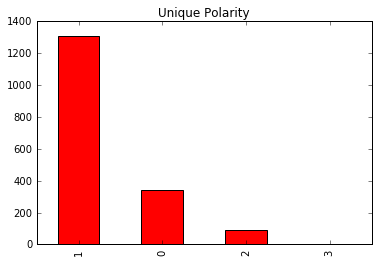

In [12]:
df["polarity_num"].value_counts().plot(kind='bar', color='red', title='Unique Polarity')
plt.savefig('polarity_num.png')

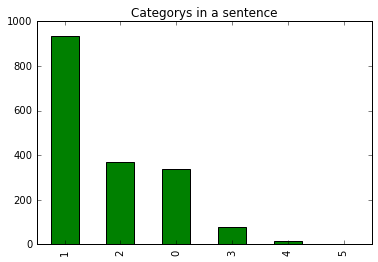

In [215]:
df.category_num.value_counts().plot(kind='bar', color='green', title='Categorys in a sentence')
plt.savefig('category_num.png')

In [13]:
df[df["polarity_num"]==2][["text","category_polarity_list","polaritys"]].head()

,text,category_polarity_list,polaritys
69,It's more expensive but well worth it in the l...,"[('LAPTOP#PRICE', 'negative'), ('LAPTOP#GENERA...","[negative, positive]"
72,"I'm glad I bought this laptop, it was worth th...","[('LAPTOP#GENERAL', 'positive'), ('LAPTOP#PRIC...","[positive, neutral]"
74,I wasn't really as concerned about portability...,"[('LAPTOP#DESIGN_FEATURES', 'neutral'), ('LAPT...","[neutral, positive]"
136,I've haven't had any major problems with the l...,"[('LAPTOP#GENERAL', 'positive'), ('PORTS#QUALI...","[positive, negative]"
151,"A little pricey but it is well, well worth it.","[('LAPTOP#PRICE', 'negative'), ('LAPTOP#GENERA...","[negative, positive]"


In [161]:
df["polarity_num"].count()

1739

In [16]:
# percentage of mixed polarity
df[df["polarity_num"]>=2]["polarity_num"].count()/df["polarity_num"].count()

0.052328924669350199

In [309]:
def getPolarity(lst):
    polarity="na"
    if len(set(lst))==1:
        polarity=lst[0]
    elif len(set(lst))>1:
        polarity='mixed'
    return polarity

In [412]:
df["polarity"] = df["polaritys"].map(getPolarity)

In [312]:
def getNewCategory(elem):
    entity, attribute = elem.split("#")
    if entity == 'LAPTOP':
        return attribute
    else:
        return entity

In [313]:
def getNewCategorys(lst):
    return list(map(getNewCategory, lst))

In [413]:
df["categorys"] = df["categorys"].map(getNewCategorys)

In [317]:
new_trainDF = df[["text", "categorys", "polarity"]]

In [414]:
new_testDF = df[["text", "categorys", "polarity"]]

In [416]:
new_testDF.to_csv('newtestDF.csv')

In [318]:
new_trainDF.head()

,text,categorys,polarity
0,Being a PC user my whole life....,[],na
1,This computer is absolutely AMAZING!!!,[GENERAL],positive
2,10 plus hours of battery...,[BATTERY],positive
3,super fast processor and really nice graphics ...,"[CPU, GRAPHICS]",positive
4,and plenty of storage with 250 gb(though I wil...,[HARD_DISC],positive


In [323]:
total_categorys = []
for cats in new_trainDF.categorys.tolist():
    total_categorys += cats

In [325]:
from collections import Counter

In [331]:
newcategory_counts = Counter(total_categorys).most_common()

In [337]:
categorys_sorted = list(map(lambda x: x[0],newcategory_counts ))

In [421]:
categorys_sorted

['GENERAL',
 'DESIGN_FEATURES',
 'OPERATION_PERFORMANCE',
 'QUALITY',
 'SUPPORT',
 'USABILITY',
 'MISCELLANEOUS',
 'DISPLAY',
 'BATTERY',
 'PRICE',
 'SOFTWARE',
 'COMPANY',
 'KEYBOARD',
 'MOUSE',
 'PORTABILITY',
 'OS',
 'CONNECTIVITY',
 'MULTIMEDIA_DEVICES',
 'GRAPHICS',
 'HARD_DISC',
 'POWER_SUPPLY',
 'CPU',
 'MEMORY',
 'SHIPPING',
 'MOTHERBOARD',
 'WARRANTY',
 'PORTS',
 'FANS_COOLING',
 'HARDWARE',
 'OPTICAL_DRIVES']

In [339]:
counts_sorted = list(map(lambda x: x[1],newcategory_counts ))

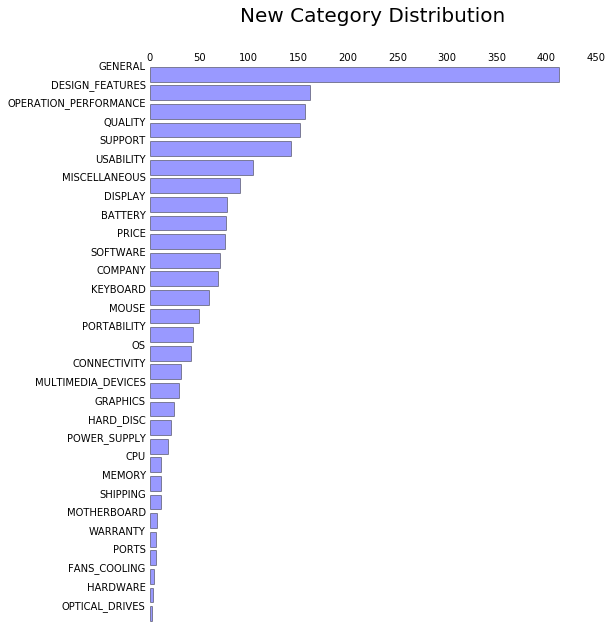

In [408]:
import pylab as plt

y_pos = np.arange(len(newcategory_counts))
fig, ax = plt.subplots()

# Format
fig = plt.gcf()
fig.set_size_inches(8, 10)

plt.barh(y_pos, counts_sorted, alpha=0.4)
plt.yticks(y_pos, categorys_sorted)

figure_title = "New Category Distribution"
plt.text(0.5, 1.08, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)


# # turn off the frame
ax.set_frame_on(False)

# # want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.grid(False)

# # Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

# plt.show()
plt.savefig('new_category_distribution.png',bbox_inches='tight')

In [391]:
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [322]:
new_trainDF.categorys.tolist()

[[],
 ['GENERAL'],
 ['BATTERY'],
 ['CPU', 'GRAPHICS'],
 ['HARD_DISC'],
 ['OPERATION_PERFORMANCE', 'USABILITY'],
 ['USABILITY'],
 [],
 ['PORTABILITY', 'CPU'],
 ['GENERAL', 'OPERATION_PERFORMANCE'],
 ['GENERAL'],
 ['PRICE', 'GENERAL'],
 [],
 ['PORTABILITY', 'QUALITY', 'USABILITY'],
 ['DESIGN_FEATURES', 'PORTABILITY', 'MISCELLANEOUS'],
 ['MISCELLANEOUS', 'QUALITY'],
 ['OS'],
 ['GENERAL'],
 ['DESIGN_FEATURES'],
 ['PORTABILITY'],
 ['BATTERY', 'BATTERY'],
 ['BATTERY'],
 ['SUPPORT'],
 ['SUPPORT'],
 ['SUPPORT'],
 ['GENERAL'],
 ['QUALITY'],
 [],
 ['SUPPORT'],
 ['SUPPORT'],
 ['GENERAL'],
 ['COMPANY'],
 ['COMPANY'],
 ['GENERAL'],
 ['PORTABILITY'],
 ['DISPLAY', 'DISPLAY'],
 ['GENERAL'],
 ['GENERAL'],
 ['QUALITY'],
 ['QUALITY'],
 ['QUALITY'],
 ['GENERAL'],
 ['GENERAL'],
 ['GENERAL'],
 ['GENERAL'],
 ['USABILITY'],
 ['GENERAL', 'OS'],
 ['OPERATION_PERFORMANCE', 'USABILITY', 'CONNECTIVITY'],
 ['CONNECTIVITY'],
 ['BATTERY'],
 ['BATTERY'],
 ['GENERAL', 'OPERATION_PERFORMANCE', 'HARD_DISC', 'QUALITY'],
 

In [ ]:
from collections import Counter

In [299]:
new_trainDF["categorys"].map(getNewCategorys)

In [302]:
new_testDF.head()

,text,categorys,polarity
0,"This computer periodically crashes (Office, IP...","['LAPTOP#OPERATION_PERFORMANCE', 'SOFTWARE#GEN...",negative
1,It takes a long time to get on the Web and to ...,"['LAPTOP#OPERATION_PERFORMANCE', 'LAPTOP#CONNE...",negative
2,Locks up she searching for updates.,['LAPTOP#OPERATION_PERFORMANCE'],negative
3,Just to be clear.,[],na
4,I have been an Apple user since they switched ...,[],na


In [262]:
new_testDF = df[["text", "categorys", "polarity"]]

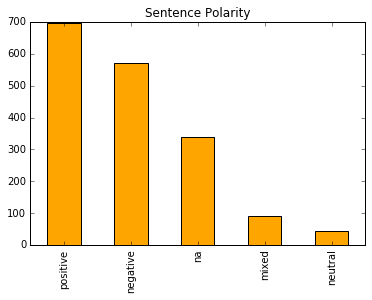

In [249]:
new_trainDF.polarity.value_counts().plot(kind='bar', color='orange', title='Sentence Polarity')
plt.savefig('sentence_polarity.png',bbox_inches='tight')

In [418]:
new_trainDF.to_csv("newTrainDF.csv")

In [420]:
new_trainDF.head()

,text,categorys,polarity
0,Being a PC user my whole life....,[],na
1,This computer is absolutely AMAZING!!!,[GENERAL],positive
2,10 plus hours of battery...,[BATTERY],positive
3,super fast processor and really nice graphics ...,"[CPU, GRAPHICS]",positive
4,and plenty of storage with 250 gb(though I wil...,[HARD_DISC],positive


In [263]:
new_testDF.to_csv("newTestDF.csv")

In [419]:
new_testDF.head()

,text,categorys,polarity
0,"This computer periodically crashes (Office, IP...","[OPERATION_PERFORMANCE, SOFTWARE]",negative
1,It takes a long time to get on the Web and to ...,"[OPERATION_PERFORMANCE, CONNECTIVITY]",negative
2,Locks up she searching for updates.,[OPERATION_PERFORMANCE],negative
3,Just to be clear.,[],na
4,I have been an Apple user since they switched ...,[],na
